In [1]:
import hydra
import torch

from omegaconf import DictConfig, OmegaConf
from hydra.core.global_hydra import GlobalHydra
from hydra import compose, initialize


import sys

sys.path.append("../")

from complex_neural_source_localization.dataset import DCASE2019Task3Dataset, load_multichannel_wav, create_dataloaders
from complex_neural_source_localization.model import DOACNet
from complex_neural_source_localization.utils.model_visualization import (
    plot_multichannel_spectrogram,
    plot_spectrogram,
    plot_model_output,
    plot_real_feature_maps,
    plot_real_feature_map
)
from complex_neural_source_localization.trainer import DOACNetLightniningModule

GlobalHydra.instance().clear()
initialize(config_path="../config")
config = compose("config")

MODEL_CHECKPOINT_PATH = "/Users/ezajlerg/datasets/complex_valued_source_localization/weights_7.ckpt"

In [2]:
dataset = create_dataloaders(config)[0] # 0=train | -1=test

model = DOACNetLightniningModule(config)
model.model.track_feature_maps()
model.eval()
checkpoint = torch.load(MODEL_CHECKPOINT_PATH, map_location=torch.device('cpu'))
model.load_state_dict(checkpoint["state_dict"])

batch = next(iter(dataset))
model_output = model(batch[0])
feature_maps = model.model.feature_maps


Batch metadata: tensor([-3.1416])


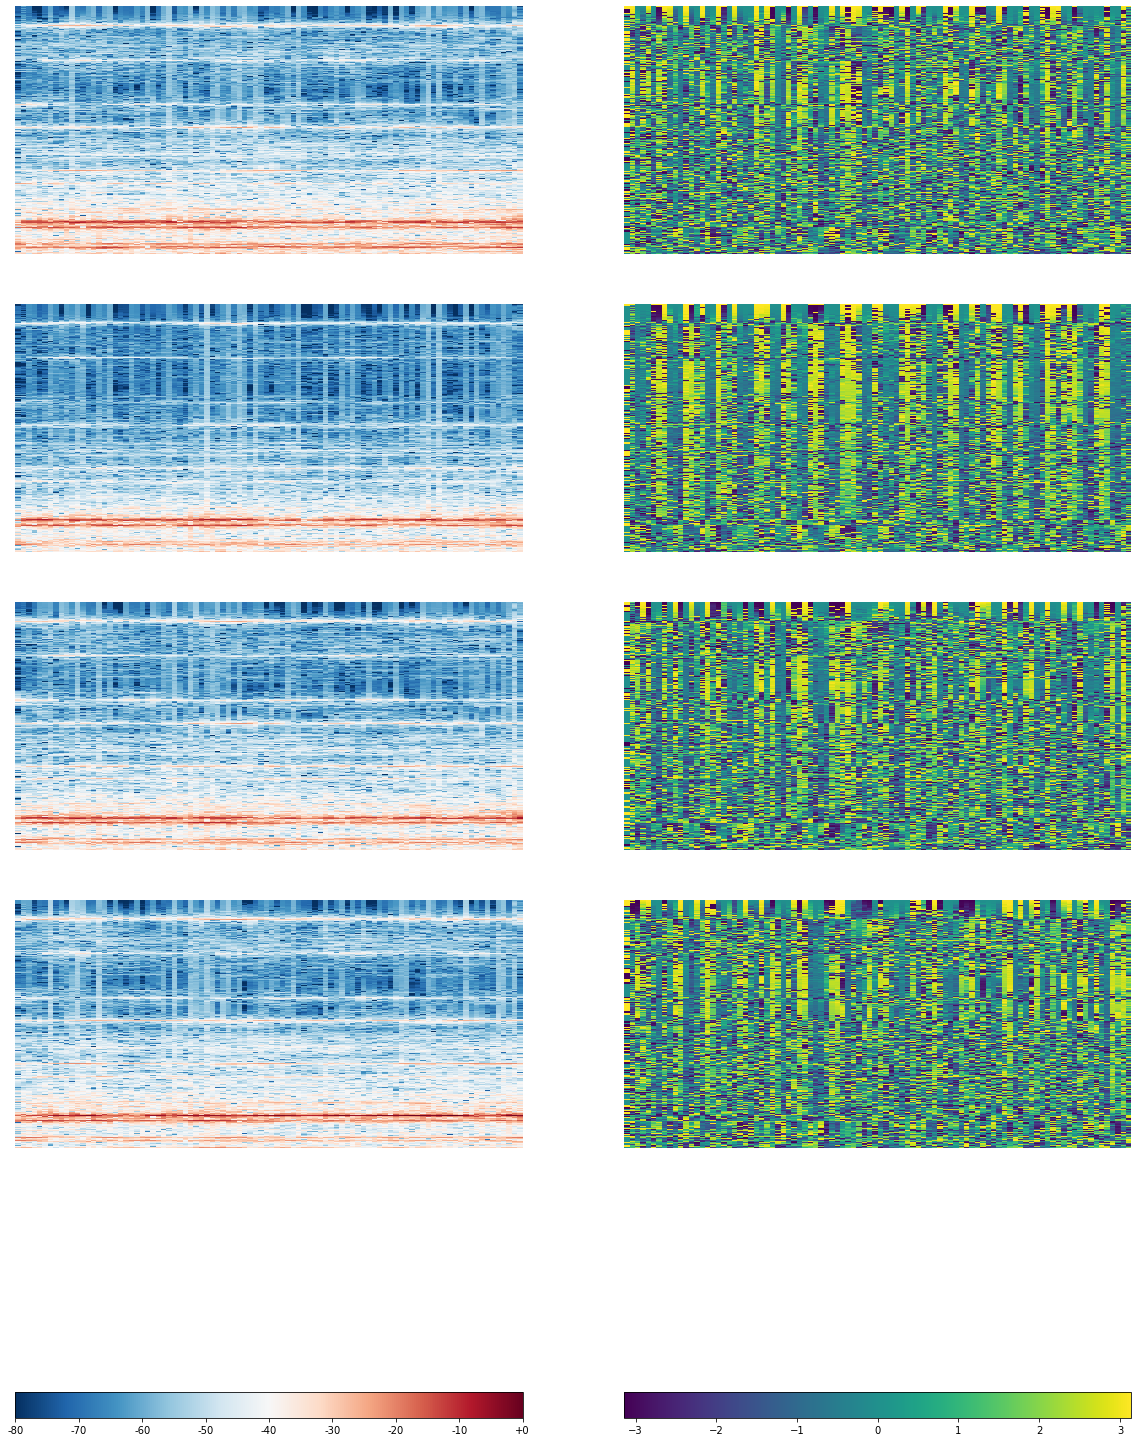

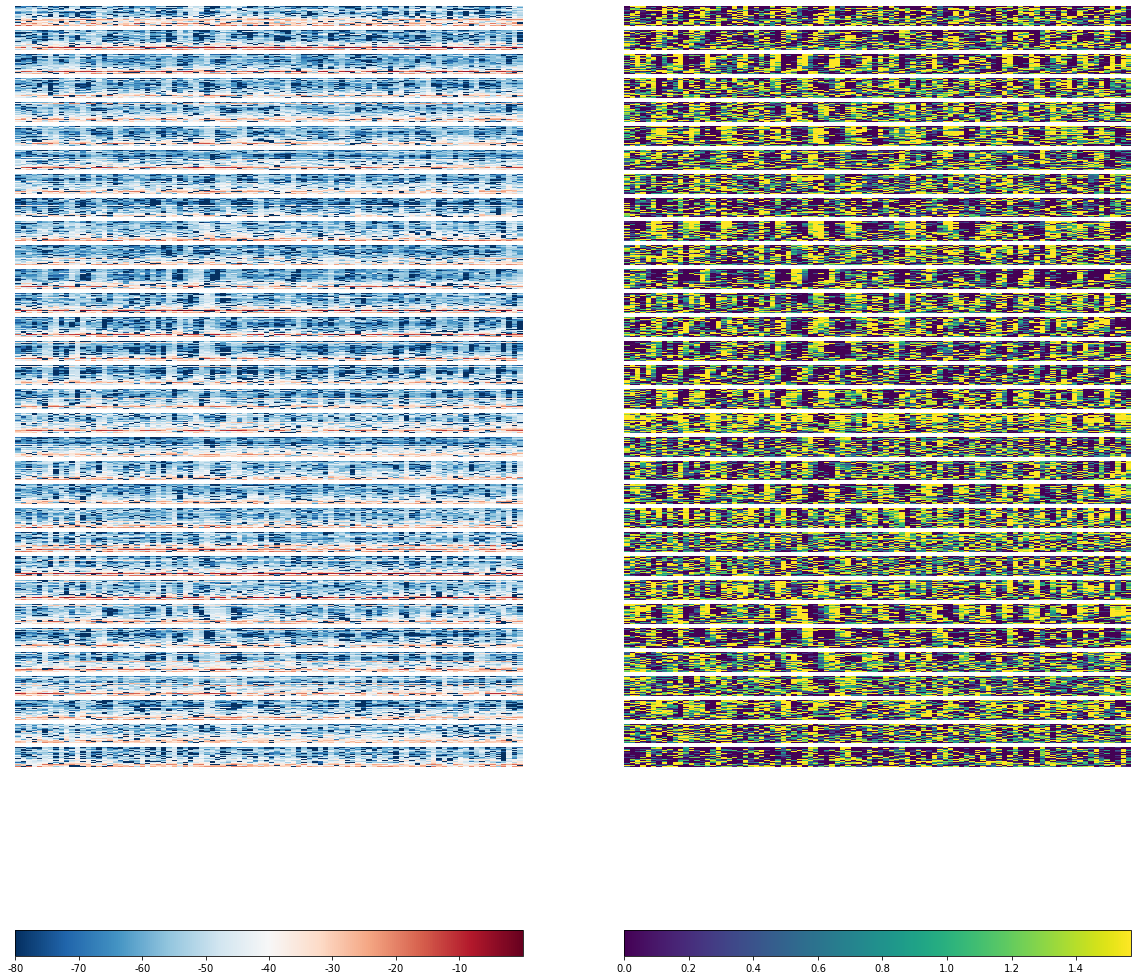

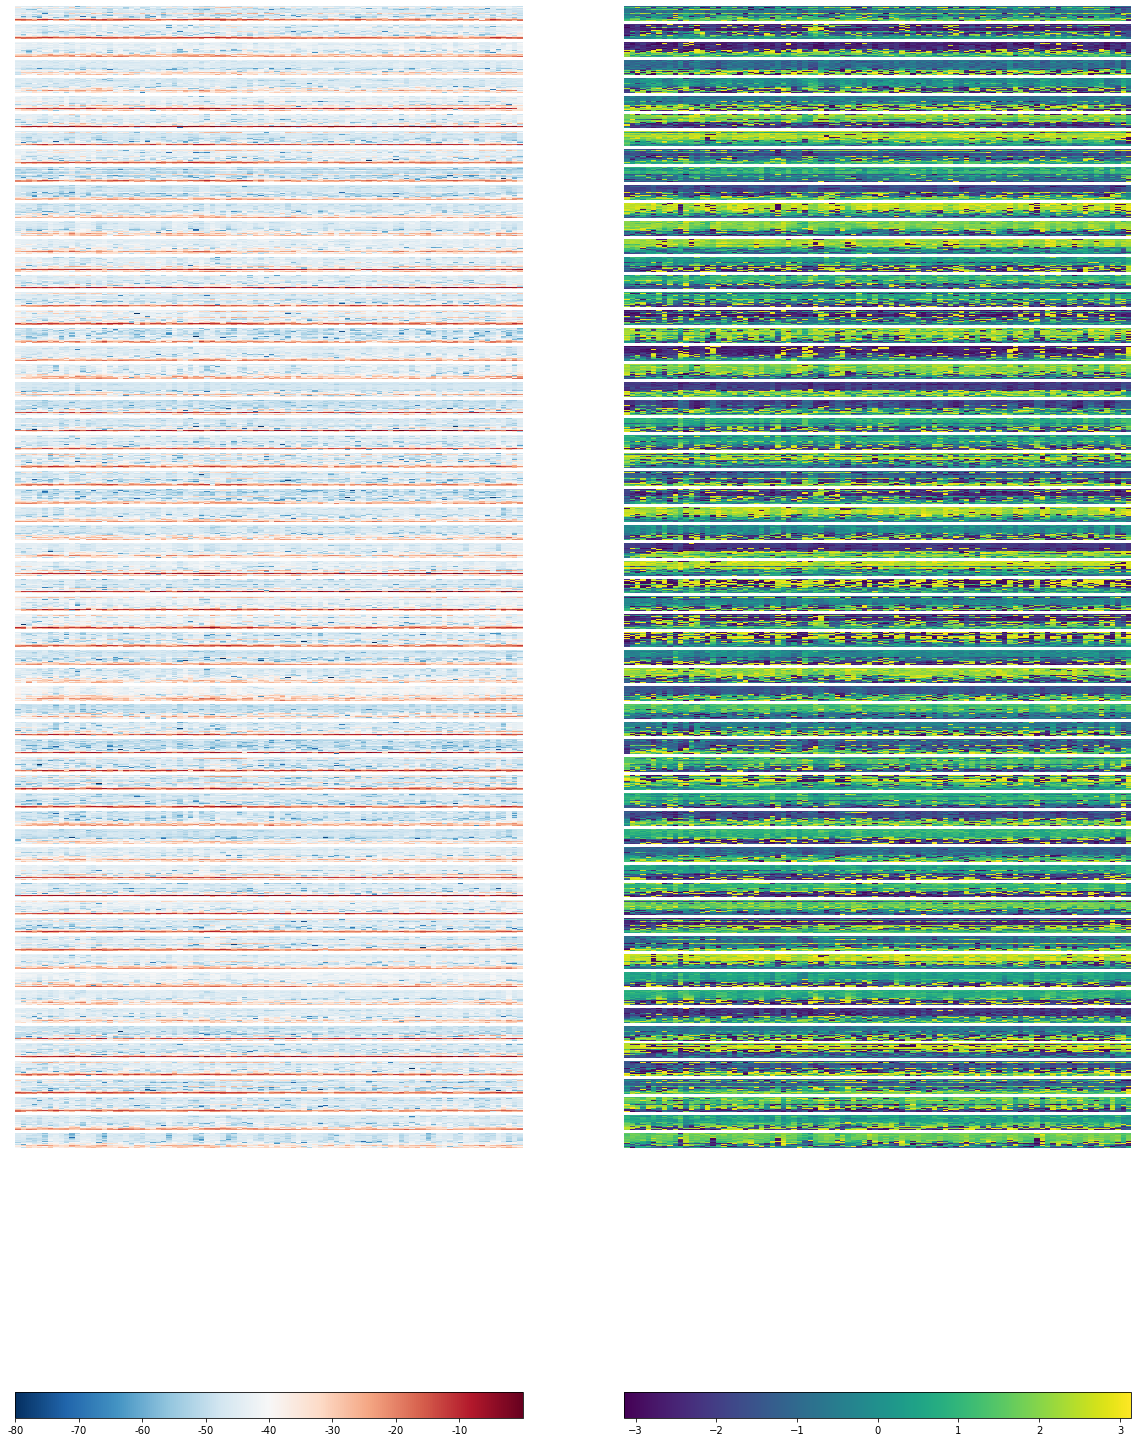

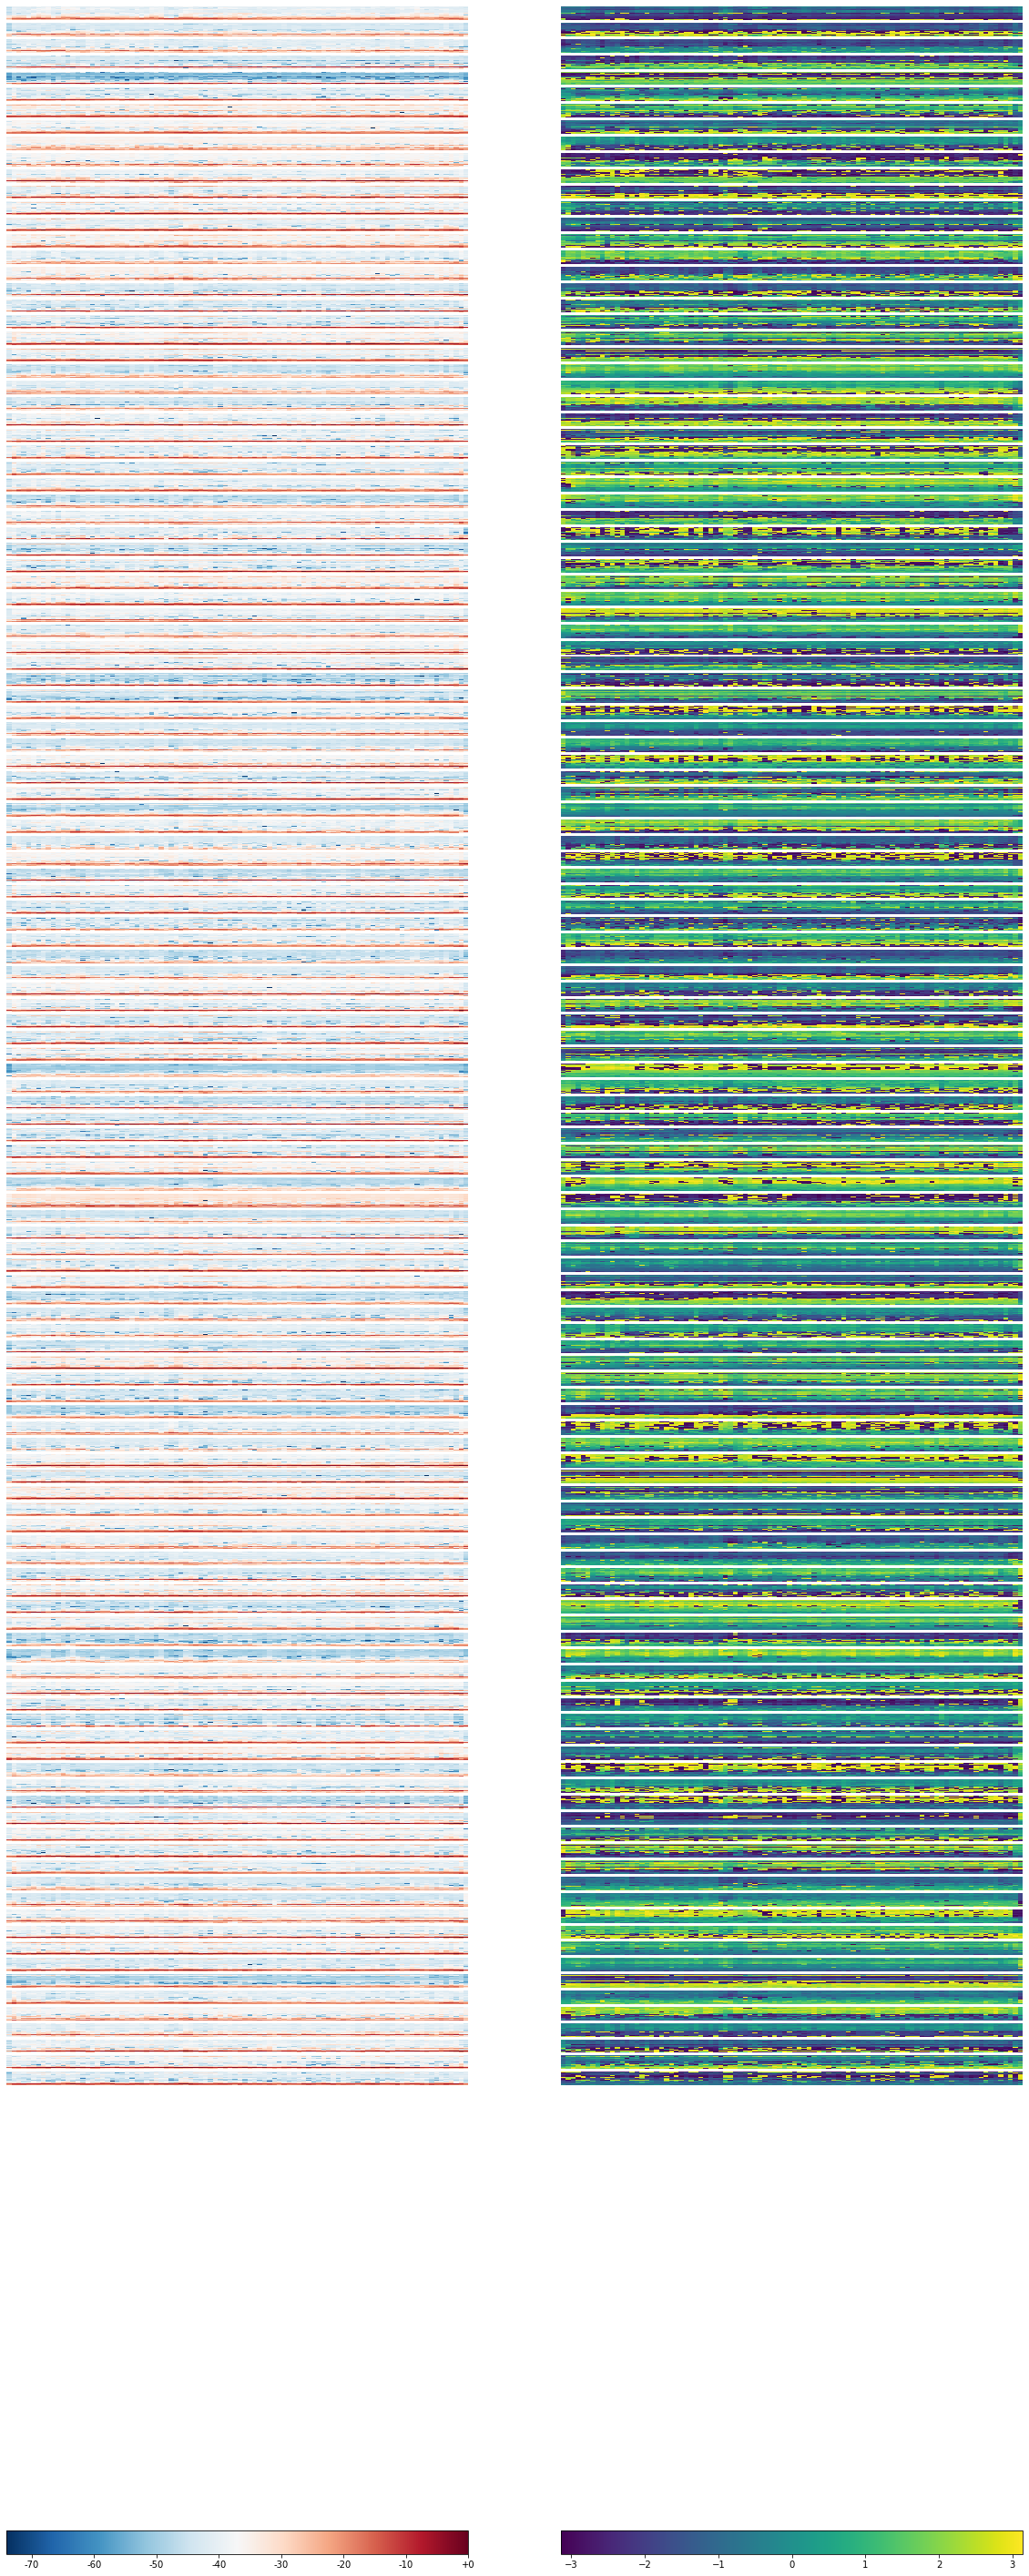

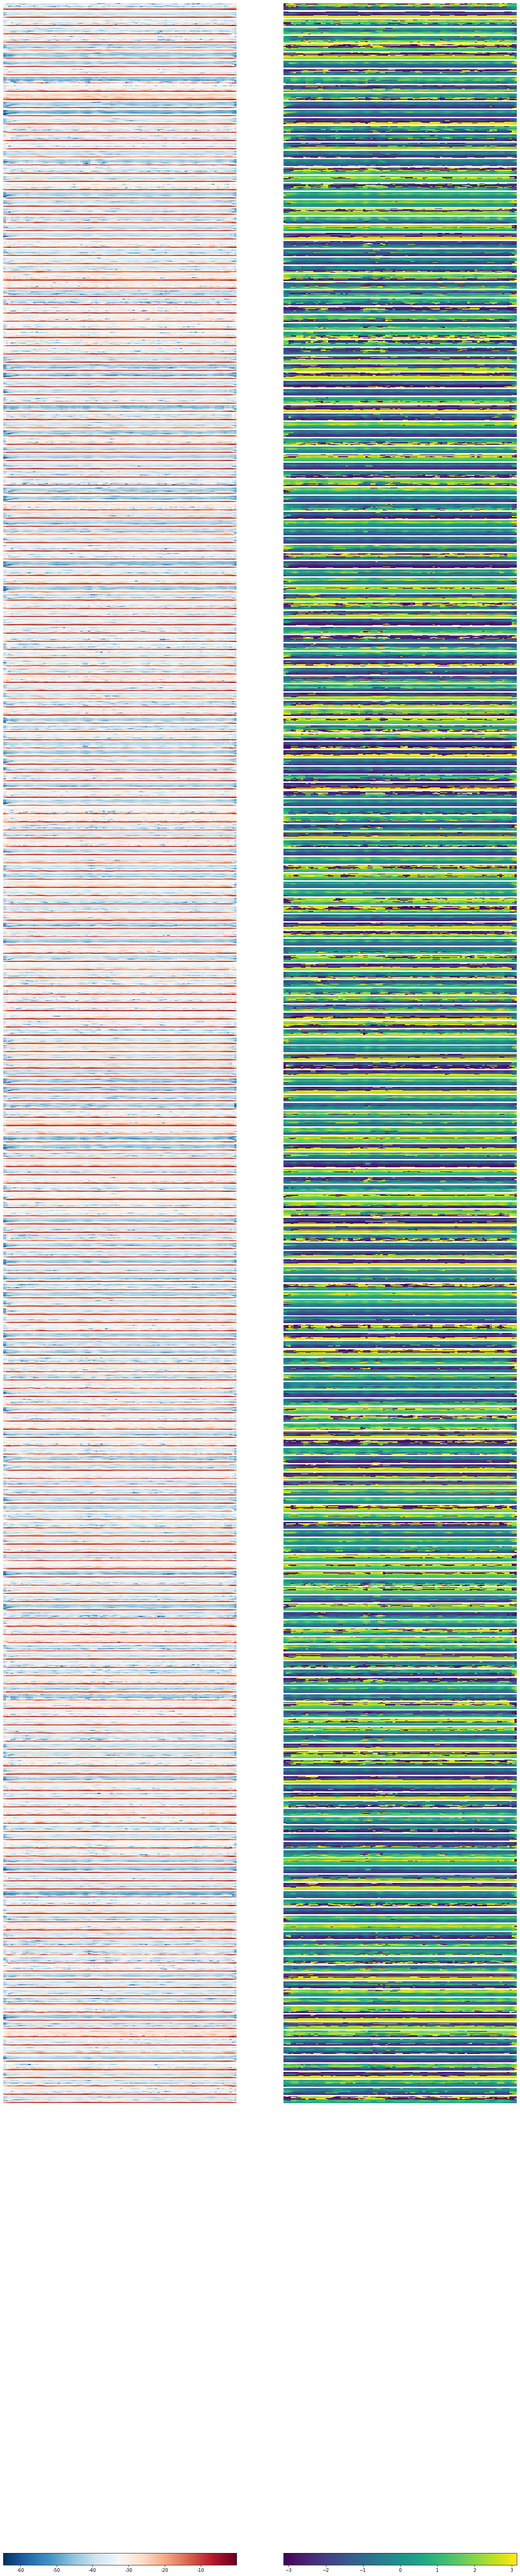

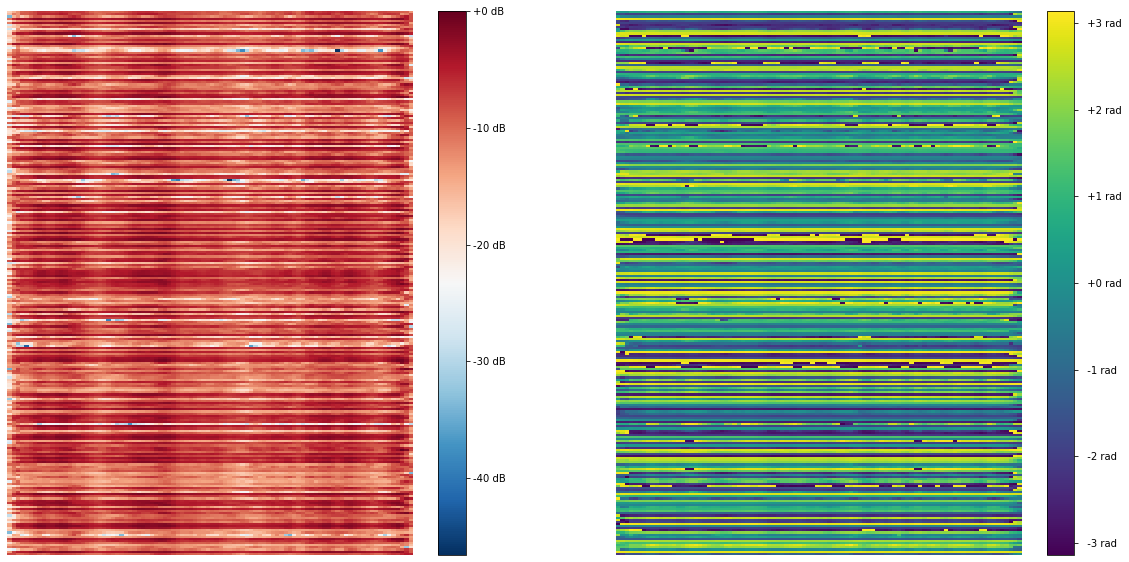

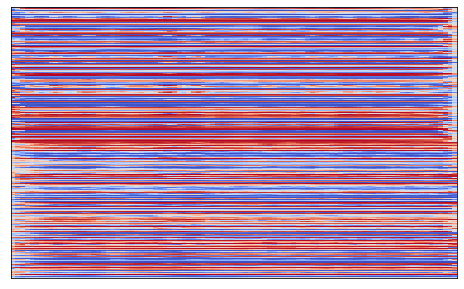

In [3]:
feature_maps = model.model.feature_maps

batch_idx = 8
plot_multichannel_spectrogram(feature_maps["stft"][batch_idx], mode="row", figsize=(20, 30), close=False, unwrap=False)
plot_multichannel_spectrogram(feature_maps["conv_0"][batch_idx].transpose(-1, -2), close=False, mode="row",
                figsize=(20, 20), unwrap=False)

plot_multichannel_spectrogram(feature_maps["conv_1"][batch_idx].transpose(-1, -2), close=False, mode="row",
                figsize=(20, 30), unwrap=False)
plot_multichannel_spectrogram(feature_maps["conv_2"][batch_idx].transpose(-1, -2), close=False, mode="row",
                figsize=(20, 60), unwrap=False)
plot_multichannel_spectrogram(feature_maps["conv_3"][batch_idx].transpose(-1, -2), close=False, mode="row",
                figsize=(20, 120), unwrap=False)

mean_conv = torch.mean(feature_maps["conv_3"][batch_idx], dim=-1)
plot_spectrogram(mean_conv, close=False, mode="row",
                figsize=(20, 10), unwrap=False)


plot_real_feature_map(feature_maps["rnn"][batch_idx].T, close=False, mode="row", figsize=(8, 5))

# plot_real_feature_maps(feature_maps["conv_1"][batch_idx].transpose(-1, -2), close=False, mode="row",
#                 figsize=(10, 20))
# plot_real_feature_maps(feature_maps["conv_2"][batch_idx].transpose(-1, -2), close=False, mode="row",
#                 figsize=(10, 20))
# plot_real_feature_maps(feature_maps["conv_3"][batch_idx].transpose(-1, -2), close=False, mode="row",
#                 figsize=(10, 20))

print("Batch metadata:", batch[1]['azimuth_in_radians'][batch_idx])
